# Optimisation of a Neocortical Layer 5 Pyramidal Cell

This notebook shows you how to optimise the maximal conductance of Neocortical Layer 5 Pyramidal Cell as used in Markram et al. 2015.

Author of this script: Werner Van Geit @ Blue Brain Project

Choice of parameters, protocols and other settings was done by Etay Hay @ HUJI

What's described here is a more advanced use of BluePyOpt. We suggest to first go through the introductary example here: https://github.com/BlueBrain/BluePyOpt/blob/master/examples/simplecell/simplecell.ipynb

**If you use the methods in this notebook, we ask you to cite the following publications when publishing your research:**

Van Geit, W., M. Gevaert, G. Chindemi, C. Rössert, J.-D. Courcol, E. Muller, F. Schürmann, I. Segev, and H. Markram (2016, March). BluePyOpt: Leveraging open source software and cloud infrastructure to optimise model parameters in neuroscience. ArXiv e-prints.
http://arxiv.org/abs/1603.00500

Markram, H., E. Muller, S. Ramaswamy, M. W. Reimann, M. Abdellah, C. A. Sanchez, A. Ailamaki, L. Alonso-Nanclares, N. Antille, S. Arsever, et al. (2015). Reconstruction and simulation of neocortical microcircuitry. Cell 163(2), 456–492.
http://www.cell.com/abstract/S0092-8674%2815%2901191-5

Some of the modules loaded in this script are located in the L5PC example folder: https://github.com/BlueBrain/BluePyOpt/tree/master/examples/l5pc 

We first load the bluepyopt python module, the ephys submodule and some helper functionality

In [1]:
%load_ext autoreload
%autoreload

from __future__ import print_function

!nrnivmodl mechanisms
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

import pprint
pp = pprint.PrettyPrinter(indent=2)

%matplotlib notebook
import matplotlib.pyplot as plt

/Users/werner/src/bpopt/examples/l5pc
mechanisms/CaDynamics_E2.mod mechanisms/Ca_HVA.mod mechanisms/Ca_LVAst.mod mechanisms/Ih.mod mechanisms/Im.mod mechanisms/K_Pst.mod mechanisms/K_Tst.mod mechanisms/NaTa_t.mod mechanisms/NaTs2_t.mod mechanisms/Nap_Et2.mod mechanisms/ProbAMPANMDA_EMS.mod mechanisms/ProbGABAAB_EMS.mod mechanisms/SK_E2.mod mechanisms/SKv3_1.mod
CaDynamics_E2.mod Ca_HVA.mod Ca_LVAst.mod Ih.mod Im.mod K_Pst.mod K_Tst.mod NaTa_t.mod NaTs2_t.mod Nap_Et2.mod ProbAMPANMDA_EMS.mod ProbGABAAB_EMS.mod SK_E2.mod SKv3_1.mod
"/Users/werner/local/nrnnogui/share/nrn/libtool"  --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/Users/werner/local/nrnnogui/include/nrn" -I"/Users/werner/local/nrnnogui/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/Users/werner/local/nrnnogui/include/nrn -I/Users/werner/local/nrnnogui/x86_64/lib -g -O2 -c mod_func.c  -fno-common -DPIC -o .libs/mod_func.o
"/Users/werner/local/nrnnogui/share/nrn/libtoo

Enable the code below to enable debug level logging

In [2]:
# import logging                                                                      
# logging.basicConfig()                                                               
# logger = logging.getLogger()                                                        
# logger.setLevel(logging.DEBUG)   

## Model description

### Morphology

We're using a complex reconstructed morphology of an L5PC cell. Let's visualise this with the BlueBrain NeuroM software:

Requirement already up-to-date: neurom in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: pyyaml>=3.10 in /usr/local/lib/python2.7/site-packages (from neurom)
Requirement already up-to-date: enum34>=1.0.4 in /usr/local/lib/python2.7/site-packages (from neurom)


/usr/local/lib/python2.7/site-packages/neurom/utils.py:81: DeprecationWarning: Module neurom.segments is deprecated. 
  _warn_deprecated('Module %s is deprecated. %s' % (mod_name, msg))
/usr/local/lib/python2.7/site-packages/neurom/utils.py:81: DeprecationWarning: Module neurom.sections is deprecated. 
  _warn_deprecated('Module %s is deprecated. %s' % (mod_name, msg))
/usr/local/lib/python2.7/site-packages/neurom/utils.py:81: DeprecationWarning: Module neurom.bifurcations is deprecated. 
  _warn_deprecated('Module %s is deprecated. %s' % (mod_name, msg))
/usr/local/lib/python2.7/site-packages/neurom/utils.py:81: DeprecationWarning: Module neurom.points is deprecated. 
  _warn_deprecated('Module %s is deprecated. %s' % (mod_name, msg))
/usr/local/lib/python2.7/site-packages/neurom/utils.py:81: DeprecationWarning: Module neurom.ezy is deprecated. 
  _warn_deprecated('Module %s is deprecated. %s' % (mod_name, msg))
/usr/local/lib/python2.7/site-packages/neurom/io/neurolucida.py:254: User

<IPython.core.display.Javascript object>


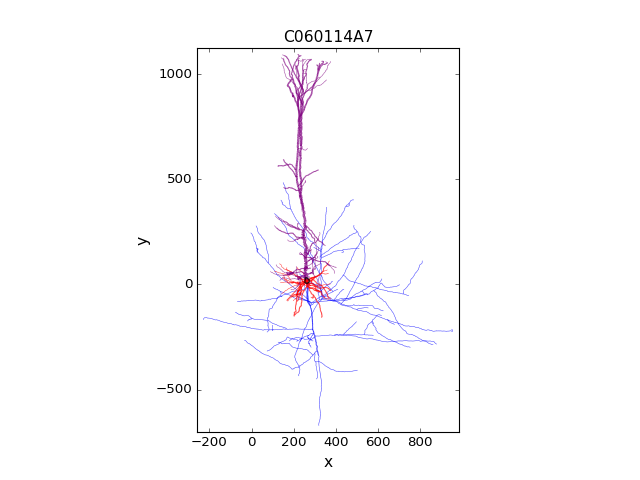

/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: Depre

In [3]:
!pip install neurom --upgrade
import neurom.viewer
neurom.viewer.draw(neurom.load_neuron('morphology/C060114A7.asc'));

To load the morphology we create a NrnFileMorphology object. We set 'do_replace_axon' to True to replace the axon with a AIS.

In [4]:
morphology = ephys.morphologies.NrnFileMorphology('morphology/C060114A7.asc', do_replace_axon=True)
print(str(morphology))

morphology/C060114A7.asc


### Parameters

Since we have many parameters in this model, they are stored in a json file: https://github.com/BlueBrain/BluePyOpt/blob/master/examples/l5pc/config/parameters.json

In [5]:
import json
param_configs = json.load(open('config/parameters.json'))
print([param_config['param_name'] for param_config in param_configs])

[u'g_pas', u'e_pas', u'cm', u'Ra', u'v_init', u'celsius', u'ena', u'ek', u'cm', u'ena', u'ek', u'cm', u'ena', u'ek', u'gIhbar_Ih', u'gNaTs2_tbar_NaTs2_t', u'gSKv3_1bar_SKv3_1', u'gImbar_Im', u'gIhbar_Ih', u'gNaTa_tbar_NaTa_t', u'gNap_Et2bar_Nap_Et2', u'gK_Pstbar_K_Pst', u'gK_Tstbar_K_Tst', u'gSK_E2bar_SK_E2', u'gSKv3_1bar_SKv3_1', u'gCa_HVAbar_Ca_HVA', u'gCa_LVAstbar_Ca_LVAst', u'gamma_CaDynamics_E2', u'decay_CaDynamics_E2', u'gNaTs2_tbar_NaTs2_t', u'gSKv3_1bar_SKv3_1', u'gSK_E2bar_SK_E2', u'gCa_HVAbar_Ca_HVA', u'gCa_LVAstbar_Ca_LVAst', u'gamma_CaDynamics_E2', u'decay_CaDynamics_E2', u'gIhbar_Ih']


The directory that contains this notebook has a module that will load all the parameters in BluePyOpt Parameter objects

In [6]:
import l5pc_model
parameters = l5pc_model.define_parameters()
print('\n'.join('%s' % param for param in parameters))

g_pas.all: ['all'] g_pas = 3e-05
e_pas.all: ['all'] e_pas = -75
cm.all: ['all'] cm = 1
Ra.all: ['all'] Ra = 100
v_init: v_init = -65
celsius: celsius = 34
ena.apical: ['apical'] ena = 50
ek.apical: ['apical'] ek = -85
cm.apical: ['apical'] cm = 2
ena.somatic: ['somatic'] ena = 50
ek.somatic: ['somatic'] ek = -85
cm.basal: ['basal'] cm = 2
ena.axonal: ['axonal'] ena = 50
ek.axonal: ['axonal'] ek = -85
gIhbar_Ih.basal: ['basal'] gIhbar_Ih = 8e-05
gNaTs2_tbar_NaTs2_t.apical: ['apical'] gNaTs2_tbar_NaTs2_t = [0, 0.04]
gSKv3_1bar_SKv3_1.apical: ['apical'] gSKv3_1bar_SKv3_1 = [0, 0.04]
gImbar_Im.apical: ['apical'] gImbar_Im = [0, 0.001]
gIhbar_Ih.apical: ['apical'] gIhbar_Ih = 8e-05
gNaTa_tbar_NaTa_t.axonal: ['axonal'] gNaTa_tbar_NaTa_t = [0, 4]
gNap_Et2bar_Nap_Et2.axonal: ['axonal'] gNap_Et2bar_Nap_Et2 = [0, 4]
gK_Pstbar_K_Pst.axonal: ['axonal'] gK_Pstbar_K_Pst = [0, 1]
gK_Tstbar_K_Tst.axonal: ['axonal'] gK_Tstbar_K_Tst = [0, 0.1]
gSK_E2bar_SK_E2.axonal: ['axonal'] gSK_E2bar_SK_E2 = [0, 0.1

As you can see there are two types of parameters, parameters with a fixed value and parameters with bounds. The latter will be optimised by the algorithm.

### Mechanism

We also need to add all the necessary mechanisms, like ion channels to the model. 
The configuration of the mechanisms is also stored in a json file, and can be loaded in a similar way.

In [7]:
mechanisms = l5pc_model.define_mechanisms()
print('\n'.join('%s' % mech for mech in mechanisms))

Ih.basal: Ih at ['basal']
pas.all: pas at ['all']
NaTs2_t.somatic: NaTs2_t at ['somatic']
SKv3_1.somatic: SKv3_1 at ['somatic']
SK_E2.somatic: SK_E2 at ['somatic']
CaDynamics_E2.somatic: CaDynamics_E2 at ['somatic']
Ca_HVA.somatic: Ca_HVA at ['somatic']
Ca_LVAst.somatic: Ca_LVAst at ['somatic']
Ih.somatic: Ih at ['somatic']
Ih.apical: Ih at ['apical']
Im.apical: Im at ['apical']
SKv3_1.apical: SKv3_1 at ['apical']
NaTs2_t.apical: NaTs2_t at ['apical']
Ca_LVAst.axonal: Ca_LVAst at ['axonal']
Ca_HVA.axonal: Ca_HVA at ['axonal']
CaDynamics_E2.axonal: CaDynamics_E2 at ['axonal']
SKv3_1.axonal: SKv3_1 at ['axonal']
SK_E2.axonal: SK_E2 at ['axonal']
K_Tst.axonal: K_Tst at ['axonal']
K_Pst.axonal: K_Pst at ['axonal']
Nap_Et2.axonal: Nap_Et2 at ['axonal']
NaTa_t.axonal: NaTa_t at ['axonal']


# Cell model

With the morphology, mechanisms and parameters we can build the cell model

In [8]:
l5pc_cell = ephys.models.CellModel('l5pc', morph=morphology, mechs=mechanisms, params=parameters)
print(l5pc_cell)

l5pc:
  morphology:
    morphology/C060114A7.asc
  mechanisms:
    Ih.basal: Ih at ['basal']
    pas.all: pas at ['all']
    NaTs2_t.somatic: NaTs2_t at ['somatic']
    SKv3_1.somatic: SKv3_1 at ['somatic']
    SK_E2.somatic: SK_E2 at ['somatic']
    CaDynamics_E2.somatic: CaDynamics_E2 at ['somatic']
    Ca_HVA.somatic: Ca_HVA at ['somatic']
    Ca_LVAst.somatic: Ca_LVAst at ['somatic']
    Ih.somatic: Ih at ['somatic']
    Ih.apical: Ih at ['apical']
    Im.apical: Im at ['apical']
    SKv3_1.apical: SKv3_1 at ['apical']
    NaTs2_t.apical: NaTs2_t at ['apical']
    Ca_LVAst.axonal: Ca_LVAst at ['axonal']
    Ca_HVA.axonal: Ca_HVA at ['axonal']
    CaDynamics_E2.axonal: CaDynamics_E2 at ['axonal']
    SKv3_1.axonal: SKv3_1 at ['axonal']
    SK_E2.axonal: SK_E2 at ['axonal']
    K_Tst.axonal: K_Tst at ['axonal']
    K_Pst.axonal: K_Pst at ['axonal']
    Nap_Et2.axonal: Nap_Et2 at ['axonal']
    NaTa_t.axonal: NaTa_t at ['axonal']
  params:
    g_pas.all: ['all'] g_pas = 3e-05
    e_pa

For use in the cell evaluator later, we need to make a list of the name of the parameters we are going to optimise.
These are the parameters that are not frozen.

In [9]:
param_names = [param.name for param in l5pc_cell.params.values() if not param.frozen]      

## Protocols

Now that we have a cell model, we can apply protocols to it. The protocols are also stored in a json file.

In [10]:
proto_configs = json.load(open('config/protocols.json'))
print(proto_configs)

{u'Step1': {u'stimuli': [{u'delay': 700, u'amp': 0.458, u'duration': 2000, u'totduration': 3000}, {u'delay': 0, u'amp': -0.126, u'duration': 3000, u'totduration': 3000}]}, u'Step3': {u'stimuli': [{u'delay': 700, u'amp': 0.95, u'duration': 2000, u'totduration': 3000}, {u'delay': 0, u'amp': -0.126, u'duration': 3000, u'totduration': 3000}]}, u'Step2': {u'stimuli': [{u'delay': 700, u'amp': 0.562, u'duration': 2000, u'totduration': 3000}, {u'delay': 0, u'amp': -0.126, u'duration': 3000, u'totduration': 3000}]}, u'bAP': {u'stimuli': [{u'delay': 295, u'amp': 1.9, u'duration': 5, u'totduration': 600}], u'extra_recordings': [{u'var': u'v', u'somadistance': 660, u'type': u'somadistance', u'name': u'dend1', u'seclist_name': u'apical'}, {u'var': u'v', u'somadistance': 800, u'type': u'somadistance', u'name': u'dend2', u'seclist_name': u'apical'}]}}


And they can be automatically loaded

In [11]:
import l5pc_evaluator
fitness_protocols = l5pc_evaluator.define_protocols()
print('\n'.join('%s' % protocol for protocol in fitness_protocols.values()))

bAP:
  stimuli:
    Square pulse amp 1.900000 delay 295.000000 duration 5.000000 totdur 600.000000 at somatic[0](0.5)
  recordings:
    bAP.soma.v: v at somatic[0](0.5)
    bAP.dend1.v: v at 660.000000 micron from soma in apical
    bAP.dend2.v: v at 800.000000 micron from soma in apical

Step3:
  stimuli:
    Square pulse amp 0.950000 delay 700.000000 duration 2000.000000 totdur 3000.000000 at somatic[0](0.5)
    Square pulse amp -0.126000 delay 0.000000 duration 3000.000000 totdur 3000.000000 at somatic[0](0.5)
  recordings:
    Step3.soma.v: v at somatic[0](0.5)

Step2:
  stimuli:
    Square pulse amp 0.562000 delay 700.000000 duration 2000.000000 totdur 3000.000000 at somatic[0](0.5)
    Square pulse amp -0.126000 delay 0.000000 duration 3000.000000 totdur 3000.000000 at somatic[0](0.5)
  recordings:
    Step2.soma.v: v at somatic[0](0.5)

Step1:
  stimuli:
    Square pulse amp 0.458000 delay 700.000000 duration 2000.000000 totdur 3000.000000 at somatic[0](0.5)
    Square pulse amp

## eFeatures

For every protocol we need to define which eFeatures will be used as objectives of the optimisation algorithm.

In [12]:
feature_configs = json.load(open('config/features.json'))
pp.pprint(feature_configs)

{ u'Step1': { u'soma': { u'AHP_depth_abs': [-60.3636, 2.3018],
                         u'AHP_depth_abs_slow': [-61.1513, 2.3385],
                         u'AHP_slow_time': [0.1599, 0.0483],
                         u'AP_height': [25.0141, 3.1463],
                         u'AP_width': [3.5312, 0.8592],
                         u'ISI_CV': [0.109, 0.1217],
                         u'adaptation_index2': [0.0047, 0.0514],
                         u'doublet_ISI': [62.75, 9.6667],
                         u'mean_frequency': [6, 1.2222],
                         u'time_to_first_spike': [27.25, 5.7222]}},
  u'Step2': { u'soma': { u'AHP_depth_abs': [-59.9055, 1.8329],
                         u'AHP_depth_abs_slow': [-60.2471, 1.8972],
                         u'AHP_slow_time': [0.1676, 0.0339],
                         u'AP_height': [27.1003, 3.1463],
                         u'AP_width': [2.7917, 0.7499],
                         u'ISI_CV': [0.0674, 0.075],
                         u'adaptat

In [13]:
fitness_calculator = l5pc_evaluator.define_fitness_calculator(fitness_protocols)
print(fitness_calculator)

objectives:
  ( AP_height for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 25.0141 and std 3.1463 and AP threshold override -20 )
  ( AHP_slow_time for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 0.1599 and std 0.0483 and AP threshold override -20 )
  ( ISI_CV for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 0.109 and std 0.1217 and AP threshold override -20 )
  ( doublet_ISI for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 62.75 and std 9.6667 and AP threshold override -20 )
  ( AHP_depth_abs_slow for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean -61.1513 and std 2.3385 and AP threshold override -20 )
  ( AP_width for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 3.5312 and std 0.8592 and AP threshold override -20 )
  ( time_to_first_spike for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 27.25 and std 5.7222 and AP threshold override -20 )
  ( AHP_

## Simulator

We need to define which simulator we will use. In this case it will be Neuron, i.e. the NrnSimulator class

In [14]:
sim = ephys.simulators.NrnSimulator()

## Evaluator

With all the components defined above we can build a cell evaluator

In [15]:
evaluator = ephys.evaluators.CellEvaluator(                                          
        cell_model=l5pc_cell,                                                       
        param_names=param_names,                                                    
        fitness_protocols=fitness_protocols,                                        
        fitness_calculator=fitness_calculator,                                      
        sim=sim)  

This evaluator can be used to run the protocols. The original parameter values for the Markram et al. 2015 L5PC model are:

In [16]:
release_params = {
    'gNaTs2_tbar_NaTs2_t.apical': 0.026145,
    'gSKv3_1bar_SKv3_1.apical': 0.004226,
    'gImbar_Im.apical': 0.000143,
    'gNaTa_tbar_NaTa_t.axonal': 3.137968,
    'gK_Tstbar_K_Tst.axonal': 0.089259,
    'gamma_CaDynamics_E2.axonal': 0.002910,
    'gNap_Et2bar_Nap_Et2.axonal': 0.006827,
    'gSK_E2bar_SK_E2.axonal': 0.007104,
    'gCa_HVAbar_Ca_HVA.axonal': 0.000990,
    'gK_Pstbar_K_Pst.axonal': 0.973538,
    'gSKv3_1bar_SKv3_1.axonal': 1.021945,
    'decay_CaDynamics_E2.axonal': 287.198731,
    'gCa_LVAstbar_Ca_LVAst.axonal': 0.008752,
    'gamma_CaDynamics_E2.somatic': 0.000609,
    'gSKv3_1bar_SKv3_1.somatic': 0.303472,
    'gSK_E2bar_SK_E2.somatic': 0.008407,
    'gCa_HVAbar_Ca_HVA.somatic': 0.000994,
    'gNaTs2_tbar_NaTs2_t.somatic': 0.983955,
    'decay_CaDynamics_E2.somatic': 210.485284,
    'gCa_LVAstbar_Ca_LVAst.somatic': 0.000333
}


Running the responses is as easy as passing the protocols and parameters to the evaluator. (The line below will take some time to execute)

In [17]:
release_responses = evaluator.run_protocols(protocols=fitness_protocols.values(), param_values=release_params)

We can now plot all the responses

<IPython.core.display.Javascript object>


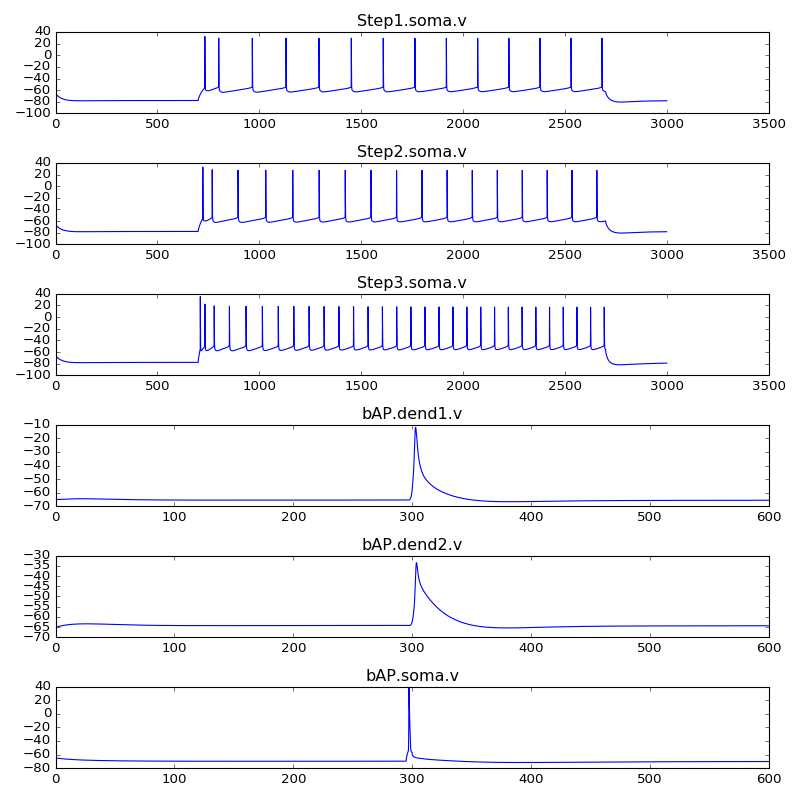

/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: Depre

In [18]:
def plot_responses(responses):
    fig, axes = plt.subplots(len(responses), figsize=(10,10))
    for index, (resp_name, response) in enumerate(sorted(responses.items())):
        axes[index].plot(response['time'], response['voltage'], label=resp_name)
        axes[index].set_title(resp_name)
    fig.tight_layout()
    fig.show()
plot_responses(release_responses)

Running an optimisation of the parameters now has become very easy. 
Of course running the L5PC optimisation will require quite some computing resources. 

To show a proof-of-concept, we will only run 2 generations, with 2 offspring individuals per generations.
If you want to run all full optimisation, you should run for 100 generations with an offspring size of 100 individuals. 

In [19]:
opt = bpopt.optimisations.DEAPOptimisation(                                     
    evaluator=evaluator,                                                            
    offspring_size=2) 
final_pop, halloffame, log, hist = opt.run(max_ngen=2, cp_filename='checkpoints/checkpoint.pkl')

The first individual in the hall of fame will contain the best solution found.

In [20]:
print(halloffame[0])

[0.0007314357233762349, 0.03367469445915072, 0.0009391491627785106, 1.5248169507528497, 1.1187461922146316, 0.3599561642296192, 0.0029040787574867947, 0.022169166627303505, 0.8757751873011441, 0.00048095122076782077, 0.008079463408928685, 0.016843185951228554, 234.40541659093483, 0.19334802048394228, 0.3527777415382436, 0.0005121897764114314, 0.00022936710285097395, 0.007891413026508394, 0.03254436076094874, 150.32985893616308]


These are the raw parameter values. 
The evaluator object can convert this in a dictionary, so that we can see the parameter names corresponding to these values.

In [21]:
best_params = evaluator.param_dict(halloffame[0])
print(pp.pprint(best_params))

{ u'decay_CaDynamics_E2.axonal': 234.40541659093483,
  u'decay_CaDynamics_E2.somatic': 150.32985893616308,
  u'gCa_HVAbar_Ca_HVA.axonal': 0.00048095122076782077,
  u'gCa_HVAbar_Ca_HVA.somatic': 0.00022936710285097395,
  u'gCa_LVAstbar_Ca_LVAst.axonal': 0.008079463408928685,
  u'gCa_LVAstbar_Ca_LVAst.somatic': 0.007891413026508394,
  u'gImbar_Im.apical': 0.0009391491627785106,
  u'gK_Pstbar_K_Pst.axonal': 0.3599561642296192,
  u'gK_Tstbar_K_Tst.axonal': 0.0029040787574867947,
  u'gNaTa_tbar_NaTa_t.axonal': 1.5248169507528497,
  u'gNaTs2_tbar_NaTs2_t.apical': 0.0007314357233762349,
  u'gNaTs2_tbar_NaTs2_t.somatic': 0.19334802048394228,
  u'gNap_Et2bar_Nap_Et2.axonal': 1.1187461922146316,
  u'gSK_E2bar_SK_E2.axonal': 0.022169166627303505,
  u'gSK_E2bar_SK_E2.somatic': 0.0005121897764114314,
  u'gSKv3_1bar_SKv3_1.apical': 0.03367469445915072,
  u'gSKv3_1bar_SKv3_1.axonal': 0.8757751873011441,
  u'gSKv3_1bar_SKv3_1.somatic': 0.3527777415382436,
  u'gamma_CaDynamics_E2.axonal': 0.01684318595

Then we can run the fitness protocols on the model with these parameter values

In [22]:
best_responses = evaluator.run_protocols(protocols=fitness_protocols.values(), param_values=best_params)

And then we can also plot these responses. 

When you ran the above optimisation with only 2 individuals and 2 generations, this 'best' model will of course be very low quality.

<IPython.core.display.Javascript object>


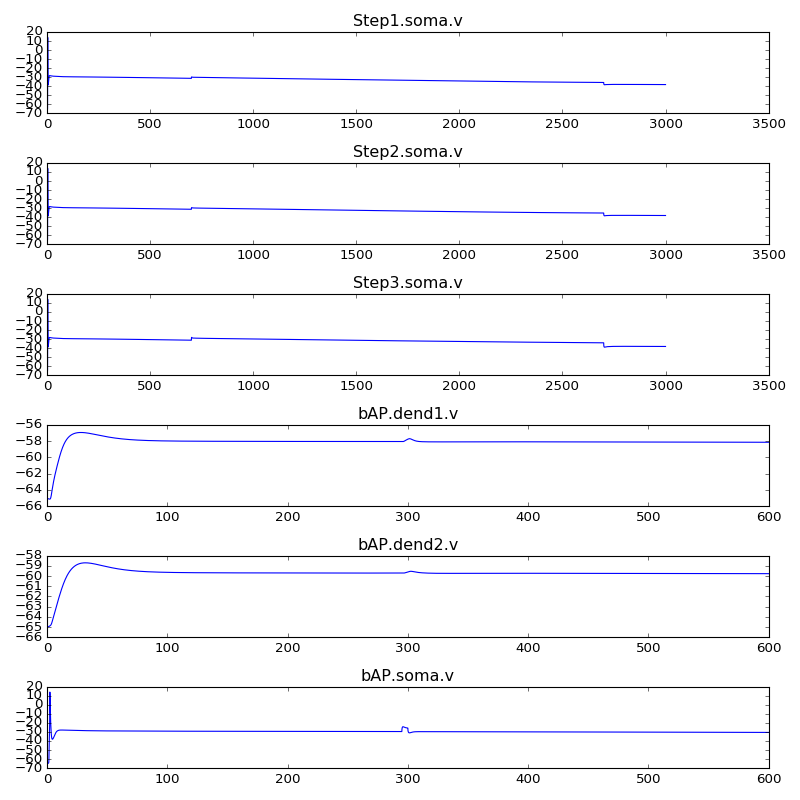

/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
/usr/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: Depre

In [23]:
plot_responses(best_responses)